# Runge Kutta 4th order

The general problem to solve is:

$$\frac{dy_i(t)}{dt} = f_i\left(t,y_1,y_2,\dotsc,y_N\right)$$

The algorithm that approximates the solution to this system of differential equations is:

$$
\begin{align}
 \mathbf{k_1} &= \mathbf{f}\left(t,\mathbf{y}(t)\right)\\
 \mathbf{k_2} &= \mathbf{f}\left(t+\frac{h}{2},\mathbf{y}(t)+\frac{h\mathbf{k_1}}{2}\right)\\
 \mathbf{k_3} &= \mathbf{f}\left(t+\frac{h}{2},\mathbf{y}(t)+\frac{h\mathbf{k_2}}{2}\right)\\
 \mathbf{k_4} &= \mathbf{f}\left(t+h,\mathbf{y}(t)+h\mathbf{k_3}\right)\\
 \mathbf{y}(t+1) &= \mathbf{y}(t) + \left(\mathbf{k_1} + 2\mathbf{k_2} + 2\mathbf{k_3} + \mathbf{k_4}\right)\frac{h}{6}
\end{align}
$$


In [7]:
function rk4!(t::Float64, y::Array{Float64,1}, dt::Float64, f::Function, params::Array{Float64,1})
    hh = dt * 0.5
    dof = length(y)
    yt = Array{Float64,1}(undef, dof)
    k1 = Array{Float64,1}(undef, dof)
    k2 = Array{Float64,1}(undef, dof)
    k3 = Array{Float64,1}(undef, dof)
    k4 = Array{Float64,1}(undef, dof)
    
    f(t,y,k1,params)
    for i = 1:dof
        yt[i] = y[i] + hh*k1[i]
    end
    f(t+hh,yt,k2,params)
    for i = 1:dof
        yt[i] = y[i] + hh*k2[i]
    end
    f(t+hh,yt,k3,params)
    for i = 1:dof
        yt[i] = y[i] + dt*k3[i]
    end
    f(t+dt,yt,k4,params)
    for i = 1:dof
        y[i] += dt/6.0 * (k1[i] + 2.0(k2[i] + k3[i]) + k4[i])
    end
    t += dt
end

rk4! (generic function with 1 method)

In [8]:
function lorenz!(t::Float64, y::Array{Float64,1}, dydt::Array{Float64,1}, params::Array{Float64,1})
    dydt[1] = params[1] * (-y[1] + y[2]);
    dydt[2] = params[2] * y[1] - y[2] -y[1] * y[3];
    dydt[3] = y[1] * y[2] - params[3] * y[3];
end

lorenz! (generic function with 1 method)

In [9]:
function forced_dual_pendulum!(t, y, dydt,params)
    sin_theta = sin(y[2]);
    sin_phi = sin(y[3]);
    cos_theta = cos(y[2]);
    cos_phi = cos(y[3]);
    x1 = A*k*cos(w*t);
    x2 = g*(m_theta*sin(2.0*y[2]) + m_phi*sin(2.0*y[3]))/2.0;
    x3 = m_theta * l_theta * y[5]*y[5]*sin_theta;
    x4 = m_phi * l_phi * y[6]*y[6]*sin_phi;
    x5 = M - m_theta*cos_theta*cos_theta - m_phi*cos_phi*cos_phi;

    X = (x1 + x2 + x3 + x4 - k*y[1] - GAMMA * y[4])/x5;
    Theta = -(g*sin_theta + X*cos_theta)/l_theta;
    Phi = -(g*sin_phi + X*cos_phi)/l_phi;
    dydt[1] = y[4];
    dydt[2] = y[5];
    dydt[3] = y[6];
    dydt[4] = X;
    dydt[5] = Theta;
    dydt[6] = Phi;
end

forced_dual_pendulum! (generic function with 1 method)

In [10]:
using Plots
gr()

Plots.GRBackend()

In [11]:
t0 = 0.0; tf = 20.0; dt = .001
y0 = [10.0,5.0,3.0]
params = [10.0,28.0,8/3.0]
x = []
y = []
z = []
while t0 < tf
    rk4!(t0,y0,dt,lorenz!,params)
    push!(x,y0[1])
    push!(y,y0[2])
    push!(z,y0[3])
    t0 += dt
end

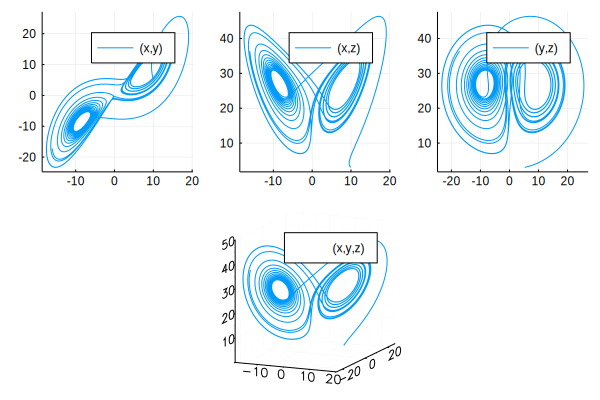

In [12]:
xyz = plot(x,y,z, label = "(x,y,z)")
xy = plot(x,y, label = "(x,y)")
xz = plot(x,z, label = "(x,z)")
yz = plot(y,z, label = "(y,z)")
a = plot(xy, xz, yz, layout=(1,3))
plot(a,xyz, layout=(2,1))